In [ ]:
def is_palindromic (n: int) -> bool:
    n_str = str(n)
    return n_str == n_str[::-1]

def is_prime (n: int) -> bool:
    if n < 2:
        return False
    p = 2
    while (p * p <= n):
        if n % p == 0:
            return False
        p += 1
    return True

def all_circular(n: int) -> tuple[int]:
    n_str = str(n)
    result = []
    for i in range(len(n_str)):
        str_tmp = int(n_str[i:] + n_str[:i])
        result.append(str_tmp)
    return tuple(result)


def palindromic_squares_and_circular_primes() -> tuple[list[int], list[int]]:
    """
    Возвращает:
    tuple:
    - список всех палиндромов a < 100000, для которых a^2 — палиндром;
    - список всех простых p < 1000000, все циклические перестановки цифр которых
    ,→ просты.
    """
    result_a = []
    for a in range(100000):
        if (is_palindromic(a) and is_palindromic(a ** 2)):
            result_a.append(a)

    result_p = []
    for p in range(2, 1000000):
        if is_prime(p):
            circular = all_circular(p)
            flag = True
            for num in circular:
                if not is_prime(num):
                    flag = False
            if flag:
                result_p.append(p)
    return (result_a, result_p)

In [ ]:
def palindromic_cubes_and_palindromic_primes() -> tuple[list[int], list[int]]:
    """
    Возвращает:
    tuple:
    - список всех палиндромов a < 100000, для которых a^3 — палиндром;
    - список всех простых p <= 10000, которые являются палиндромами.
    """
    list_a = []
    for a in range(100000):
        if is_palindromic(a) and is_palindromic(a**3):
            list_a.append(a)

    list_p = []
    for p in range(2, 10000):
        if is_prime(p) and is_palindromic(p):
            list_p.append(p)
    return (list_a, list_p)



In [ ]:
def primes_with_two_digits() -> dict[str, list[int]]:
    """
    Возвращает словарь вида:
    {
    '13': [список первых 100 простых из {1,3}],
    '15': [список первых 100 простых из {1,5}],
    '17': [список первых 100 простых из {1,7}],
    '19': [список первых 100 простых из {1,9}]
    }
    """
    result = {'13': [], '15': [], '17': [], '19': []}
    keys = ['13', '15', '17', '19']

    for x in range(4):
        key = keys[x]
        d1, d2 = key[0], key[1]
        num = []
        prime = 2

        while len(num) < 100:
            if is_prime(prime):
                str_p = str(prime)
                if str_p.replace(d1, '').replace(d2, '') == '':
                    num.append(prime)
            prime += 1

        result[key] = num

    return result

# Простых чисел, состоящих только из 1 и 5 меньше всего, так как число не может
# заканчиваться на 5. Значит среди n чисел кандидатов на простоту 2^(n-1), хотя
# для других пар таких кандидатов 2^n.

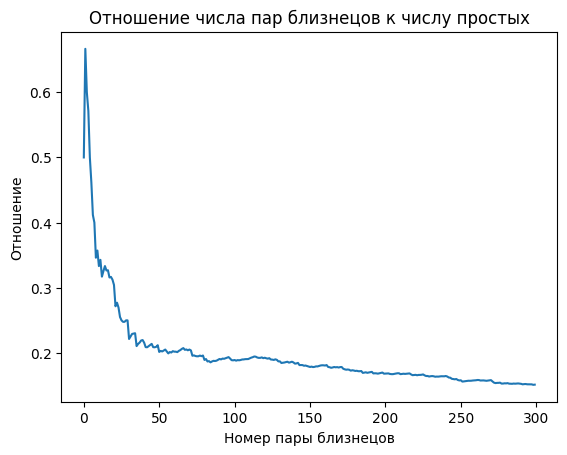

In [ ]:
def twin_primes_analysis(limit_pairs: int = 1000) -> tuple[list[tuple[int, int]],
                                                           list[float]]:
    """
    Возвращает:
    - список первых `limit_pairs` пар близнецов (p, p+2);
    - список значений отношения pi_2(n) / pi(n) для n, соответствующих последним
    элементам каждой пары,
    где pi_2(n) — количество пар близнецов <= n, pi(n) — количество простых <= n.
    """
    limit_pair = []
    limit_ratio = [0]
    num = 3
    prime_count = 1
    while len(limit_pair) < limit_pairs:
        if is_prime(num):
            prime_count += 1
            if is_prime(num + 2):
                limit_pair.append((num, num + 2))
                limit_ratio.append(len(limit_pair) / prime_count)
        num += 2
    return (limit_pair, limit_ratio)




from sympy import isprime
import matplotlib.pyplot as plt


def twin_primes_analysis(limit_pairs=300):
    pairs_count = 0
    prime_count = 1
    num = 3
    ratios = []

    while pairs_count < limit_pairs:
        if isprime(num):
            prime_count += 1
            if isprime(num + 2):
                pairs_count += 1
                ratios.append(pairs_count / prime_count)
        num += 2

    return ratios

ratio = twin_primes_analysis(300)

plt.figure()
plt.plot(ratio)
plt.xlabel("Номер пары близнецов")
plt.ylabel("Отношение")
plt.title("Отношение числа пар близнецов к числу простых")
plt.show()

#С увеличением n частота простых чисел становится все меньше. Для пары близнецов
#нужно иметь два простых числа подряд, что с уменьшением частоты простых чисел,
#происходить все реже. Знаменатель растет быстрее, чем числитель, поэтому отношение
#уменьшается. На руку гипотезе играет код выше.


In [ ]:
def prime_factorization(n: int) -> dict[int, int]:
    result = {}
    divisor = 2
    while divisor * divisor <= n:
        count = 0
        while n % divisor == 0:
            n = n // divisor
            count += 1
        if count > 0:
            result[divisor] = count
        divisor += 1
    if n > 1:
        result[n] = 1

    return result

def factorial_plus_one_factors() -> dict[int, dict[int, int]]:
    """
    Возвращает словарь вида:
    { n: {простой_делитель: степень, ...}, ... }
    для n от 2 до 50, где ключ — n, значение — разложение n! + 1 на простые множители.
    """
    num = 1
    result = {}
    for n in range(2, 51):
        num *= n
        dict_tmp = prime_factorization(num + 1)
        result[n] = dict_tmp
    return result


dict1 = factorial_plus_one_factors()

max_count = 0
max_num = 0
big = []

for n, factors in dict1.items():
    k = len(factors)
    if k > max_count:
        max_count = k
        max_num = n

    for p in factors:
        if p > 10**6:
            big.append((n, p))

print((max_num, max_count))
print(big)

KeyboardInterrupt: 

In [ ]:
import time
from sympy import totient

def gcd(a: int, b: int) -> int:
    while b != 0:
        a, b = b, a % b
    return a


def euler_phi_direct(n: int) -> int:
    """Вычисляет (n) прямым перебором."""
    count = 0
    for num in range(1, n):
        if gcd(num, n) == 1:
            count += 1
    return count

def euler_phi_factor(n: int) -> int:
    """Вычисляет (n) через разложение на простые множители."""
    factors = prime_factorization(n)
    result = n
    for p in factors:
        result = result * (p - 1) // p
    return result

def compare_euler_phi_methods(test_values: list[int]) -> dict:
    """
    Сравнивает время работы трёх методов на заданных значениях.
    Возвращает словарь с тремя списками времён (в секундах).
    """
    times_direct = []
    times_factor = []
    times_sympy = []

    for n in test_values:

        t1 = time.time()
        a = euler_phi_direct(n)
        t1 = time.time() - t1
        times_direct.append(t1)

        t2 = time.time()
        b = euler_phi_factor(n)
        t2 = time.time() - t2
        times_factor.append(t2)

        t3 = time.time()
        c = totient(n)
        t3 = time.time() - t3
        times_sympy.append(t3)

    return {
        "direct": times_direct,
        "factor": times_factor,
        "sympy": times_sympy
    }


test_values = [10**2, 10**4, 10**6]
res = compare_euler_phi_methods(test_values)
print(res)

{'direct': [3.600120544433594e-05, 0.005107402801513672, 0.7257661819458008], 'factor': [5.0067901611328125e-06, 6.67572021484375e-06, 1.4066696166992188e-05], 'sympy': [0.0003325939178466797, 0.00018143653869628906, 0.0002608299255371094]}


In [ ]:
ISU = 467704
N = 4
m = 8
n = 6
k = 5
n1 = 4
n2 = 5
n3 = 0
p = 19
s = 15
r = 44
t = 14

In [ ]:
# Нужно скачать gap на windows, открыть терминал и запустить там этот код
subgroups_of_Sm := function(N, m)
    local G, subs, count, idx, H, index, left, right, normal;

    G := SymmetricGroup(m);
    subs := AllSubgroups(G);
    count := Length(subs);

    idx := (N mod count) + 1;
    H := subs[idx];

    index := Index(G, H);
    left := LeftCosets(G, H);
    right := RightCosets(G, H);
    normal := IsNormal(G, H);

    Print("Group S_", m, "\n");
    Print("Total subgroups: ", count, "\n");
    Print("Chosen subgroup index (1-based): ", idx, "\n");
    Print("Generators of subgroup H:\n");
    Display(GeneratorsOfGroup(H));
    Print("\n");
    Print("Index [S_m : H] = ", index, "\n");
    Print("Is H normal? ", normal, "\n");
    Print("Number of left cosets: ", Length(left), "\n");
    Print("Number of right cosets: ", Length(right), "\n");
end;

subgroups_of_Sm(4, 8);

In [ ]:
m = 8
n1 = 4
n2 = 5
n3 = 0

import math
import itertools

def order(p):
    v = [False]*len(p)
    r = 1
    for i in range(len(p)):
        if not v[i]:
            c = 0
            j = i
            while not v[j]:
                v[j] = True
                j = p[j]-1
                c += 1
            r = math.lcm(r, c)
    return r

def power(p, n):
    e = list(range(1, len(p)+1))
    if n == 0:
        return e
    if n < 0:
        inv = [0]*len(p)
        for i, v in enumerate(p):
            inv[v-1] = i+1
        return power(inv, -n)
    r = e[:]
    for _ in range(n):
        r = [r[i-1] for i in p]
    return r

def element_powers_in_Sm(N):
    perms = list(itertools.permutations(range(1, m+1)))
    g = list(perms[N % len(perms)])
    g1 = power(g, n1)
    g2 = power(g, n2)
    g3 = power(g, n3)
    return {
        f"Порядок (g^{n1})": order(g1),
        f"Порядок (g^{n2})": order(g2),
        f"Порядок (g^{n3})": order(g3),
    } #Порядок циклической подгруппы g^{k}, порожденной элементом g^{k},
    #всегда равен порядку элемента g^{k}.

print(element_powers_in_Sm(4))

{'Порядок (g^4)': 3, 'Порядок (g^5)': 3, 'Порядок (g^0)': 1}


In [ ]:
m = 8
n = 6

def solve_sigma_power_eq(N):
    target = list(range(2, m)) + [1] + [m]
    solutions = []
    for p in itertools.permutations(range(1, m+1)):
        if power(p, n) == target:
            solutions.append(list(p))
    return {
        "Количество": len(solutions),
        "Примеры": solutions
    }

print(solve_sigma_power_eq(n))
#решение одно

{'count': 1, 'examples': [[7, 1, 2, 3, 4, 5, 6, 8]]}


In [ ]:
m = 8
k = 5

def elements_of_order_k_in_cyclic_group(N: int) -> dict:
    elements = list(range(m))
    gke = [a for a in elements if (k * a) % m == 0]
    order_k = [a for a in elements if m // math.gcd(m, a) == k]
    return {
        "g^k = e": gke,
        "Порядок k": order_k
    }

In [ ]:
"""
Очевидно, что мультипликативная группа Z_m при m = 8, состоит из элементов
(1, 3, 5, 7). Так как 1 - нейтральный элемент, то все подгруппы должны содержать его.
По Теорме Лагранжа порядок подгруппы должен делить порядок группы или
должен быть делителем 4.
Это либо 1 - (1).
Либо 2 - (1, 3), (1, 5), (1, 7)
Либо 4 - (1, 3, 5, 7).
"""

def subgroups_of_Zm_star(N: int) -> list:
    groups = [
        [1],
        [1, 3],
        [1, 5],
        [1, 7],
        [1, 3, 5, 7]
    ]
    return groups

In [ ]:
"""
Рассмотрим мультипликативную группу Z*_p.
Эта группа имеет порядок p - 1, так как p - простое.
Пусть элемент s имеет порядок p - 1.
Тогда любой элемент группы можно представить в виде степени s^k.

Чтобы найти порядок элемента s^r, нужно определить наименьшее положительное число t такое,
что (s^r)^t = e, где e — единичный элемент группы.
Получаем s^(rt) = e.
Так как s имеет порядок p − 1, то e = s^(p−1). Поэтому равенство s^(rt) = e
выполняется тогда и только тогда, когда показатель rt кратен p − 1.

Минимальное положительное t, при котором rt делится на p − 1, равно (p − 1) / gcd(p − 1, r).
Следовательно, порядок элемента s^r равен (p − 1) / gcd(p − 1, r).
"""
p = 19
r = 44
def order_of_sr(N: int) -> int:
    return (p - 1) // math.gcd(p - 1, r)

print(order_of_sr(20))

9


In [ ]:
p = 19
t = 14

def order_in_Zq(a: int, q: int) -> int:
    """
    Находит порядок элемента a в мультипликативной группе Z*_q,
    """
    group_order = euler_phi_factor(q)
    for k in range(1, group_order + 1):
        if pow(a, k, q) == 1:
            return k

def order_and_primitivity_of_t(N: int) -> dict:
    order = order_in_Zq(t, p)
    is_primitive = (order == euler_phi_factor(p))
    return {
        "Порядок элемента t": order,
        "Является примитивным корнем": is_primitive
    }

print(order_and_primitivity_of_t(0))

{'Порядок элемента t': 18, 'Является примитивным корнем': True}


In [ ]:
m = 8

"""
Мультипликативная группа Z_m при m = 8, состоит из элементов (1, 3, 5, 7).
Порядок 1 - 1.
Порядок 3, 5, 7 - 2.
Соответственно в ней нет эл-та с порядком 4, значит нет примитивных корней.
"""
def generators_of_Zm_star(N: int) -> list:
    elements = [a for a in range(1, m) if math.gcd(a, m) == 1]
    group_order = euler_phi_factor(m)
    return [a for a in elements if order_in_Zq(a, m) == group_order]

print(generators_of_Zm_star(0))

[]


In [ ]:
"""
Связь с исходным элементом (t):

Подгруппа определяется остатком t mod m.

Если gcd(t, m) = 1, то подгруппа совпадает со всей группой.

Если gcd(t, m) > 1, то подгруппа имеет порядок меньше (m) и состоит из всех
кратных t по модулю m.
"""

m = 8
t = 14

def cyclic_subgroup_in_Zm_additive(N: int) -> dict:
    t_mod = t % m
    d = math.gcd(t_mod, m)
    order = m // d

    subgroup = [(k * t_mod) % m for k in range(order)]
    generators = [(k * t_mod) % m for k in range(order) if math.gcd(k, order) == 1]

    return {
        "Элемент t mod m": t_mod,
        "Порядок подгруппы": order,
        "Циклическая подгруппа": sorted(set(subgroup)),
        "Порождающие элементы": sorted(set(generators))
    }

print(cyclic_subgroup_in_Zm_additive(0))

{'Элемент t mod m': 6, 'Порядок подгруппы': 4, 'Циклическая подгруппа': [0, 2, 4, 6], 'Порождающие элементы': [2, 6]}


In [ ]:
m = 8
t = 14

def isomorphism_of_cyclic_subgroup_Zm_star(N: int) -> dict:
    t_mod = t % m

    if math.gcd(t_mod, m) != 1:
        return {
            f"t = {t_mod} не принадлежит Z*_m, так как gcd(t, m) ≠ 1"
        }
    order = order_in_Zq(t_mod, m)

    subgroup = sorted({pow(t_mod, k, m) for k in range(order)})

    iso = f"Изоморфна циклической подгруппе ⟨(1 2 3 ... {order})⟩ в S_{order}"

    return {
        "Подгруппа": subgroup,
        "Порядок подгруппы": order,
        "Изоморфная подгруппа": iso
    }

print(isomorphism_of_cyclic_subgroup_Zm_star(0))

{'t = 6 не принадлежит Z*_m, так как gcd(t, m) ≠ 1'}


In [ ]:
"""
N = 4
p = 11,
m = 2
a_i = (i+4) mod 4
b_j = (j+4) mod 7
c_k = (k+4) mod 5
d_l = (l+4) mod 9
r_m = (m+4) mod 11
s_t = (t+4) mod 11
"""

In [ ]:
from itertools import product

def poly_mod(a: list[int], b: list[int], p: int) -> int:
    """
    Деление многочленов a(x) и b(x) над конечным полем F_p с остатком.

    Выполняет стандартное деление "с вычитанием кратного" при арифметике по модулю p.
    Возвращает остаток от деления a(x) на b(x).

    Параметры:
        a (list[int]): коэффициенты делимого многочлена a(x),
                       упорядоченные от младшего к старшему.
        b (list[int]): коэффициенты делителя b(x),
                       упорядоченные от младшего к старшему.
        p (int): простое число, определяющее модуль поля F_p.

    Возвращает:
        list[int]: остаток от деления a(x) на b(x), также в виде списка коэффициентов
                   от младшего к старшему (возможно, пустого, если делится нацело).
    """
    a = a[:]
    while len(a) >= len(b):
        coef = a[-1] * pow(b[-1], -1, p) % p
        for i in range(1, len(b) + 1):
            a[-i] = (a[-i] - coef * b[-i]) % p
        while len(a) > 0 and a[-1] == 0:
            a.pop()
    return a


def is_irreducible(f: list[int], p: int) -> bool:
    """
    Проверяет, является ли многочлен f(x) неприводимым над конечным полем F_p.

    Метод:
        Перебираются все возможные моничные делители g(x) меньшей степени.
        Если хотя бы для одного g(x) остаток f(x) mod g(x) равен нулю — f(x) приводим.

    Параметры:
        f (list[int]): коэффициенты моничного многочлена f(x)
                       (от младшего к старшему).
        p (int): простое число, определяющее поле F_p.

    Возвращает:
        bool: True, если f(x) неприводим, иначе False.
    """
    deg = len(f) - 1
    for d in range(1, deg):
        for coeffs in product(range(p), repeat=d):
            g = list(coeffs) + [1]  # моничный
            if not poly_mod(f, g, p):
                return False
    return True

def generate_irreducible_polynomials(p: int, d: int) -> list[list[int]]:
    """
    Генерирует все моничные неприводимые многочлены степени deg над полем F_p.

    Параметры:
        p (int): простое число, определяющее поле F_p.
        d (int): степень искомых многочленов.

    Возвращает:
        list[list[int]]: список всех неприводимых моничных многочленов степени deg.
                         Каждый многочлен представлен списком коэффициентов
                         от младшего к старшему.
    """
    polys = []
    for coeffs in product(range(p), repeat=d):
        f = list(coeffs) + [1]
        if is_irreducible(f, p):
            polys.append(f)
    return polys

for p in (2, 3, 5):
    for d in (2, 3, 4):
        polys = generate_irreducible_polynomials(p, d)
        print(f"F{p}, степень {d}: {len(polys)} многочленов")
        for f in polys:
            print("  ", f)
        print()

F2, степень 2: 1 многочленов
   [1, 1, 1]

F2, степень 3: 2 многочленов
   [1, 0, 1, 1]
   [1, 1, 0, 1]

F2, степень 4: 3 многочленов
   [1, 0, 0, 1, 1]
   [1, 1, 0, 0, 1]
   [1, 1, 1, 1, 1]

F3, степень 2: 3 многочленов
   [1, 0, 1]
   [2, 1, 1]
   [2, 2, 1]

F3, степень 3: 8 многочленов
   [1, 0, 2, 1]
   [1, 1, 2, 1]
   [1, 2, 0, 1]
   [1, 2, 1, 1]
   [2, 0, 1, 1]
   [2, 1, 1, 1]
   [2, 2, 0, 1]
   [2, 2, 2, 1]

F3, степень 4: 18 многочленов
   [1, 0, 1, 1, 1]
   [1, 0, 1, 2, 1]
   [1, 1, 0, 2, 1]
   [1, 1, 1, 0, 1]
   [1, 1, 1, 1, 1]
   [1, 2, 0, 1, 1]
   [1, 2, 1, 0, 1]
   [1, 2, 1, 2, 1]
   [2, 0, 0, 1, 1]
   [2, 0, 0, 2, 1]
   [2, 0, 1, 0, 1]
   [2, 0, 2, 0, 1]
   [2, 1, 0, 0, 1]
   [2, 1, 1, 2, 1]
   [2, 1, 2, 2, 1]
   [2, 2, 0, 0, 1]
   [2, 2, 1, 1, 1]
   [2, 2, 2, 1, 1]

F5, степень 2: 10 многочленов
   [1, 1, 1]
   [1, 4, 1]
   [2, 0, 1]
   [2, 1, 1]
   [2, 4, 1]
   [3, 0, 1]
   [3, 2, 1]
   [3, 3, 1]
   [4, 2, 1]
   [4, 3, 1]

F5, степень 3: 40 многочленов
   [1, 0, 1, 1]
 